In [1]:
'Redes geneticas estocasticas' 'togle switch'

#En este programa se implementa el agoritmo de Gillespie para reacciones bioquimicas,
#especificamente para una red de transcripcion/traduccion.

# se importan las librerias que seran usadas
import numpy as np
import math 
import random as rnd
import matplotlib.pyplot as plt
import statistics as st

#para implementar el algoritmo son necesarias algunas cantidades y definir algunos parametros
#condiciones iniciales de las variables involucradas y el tiempo

A=np.array([ [0,-1],
             [-1,0],]) # matriz de conexiones

t0=0.0 #tiempo inicial
tf= 20 # tiempo final
N=[2,2,2]  #coeficientes de de Hill para cada uno de los nodos
K=[1,1,1] # constantes de Michelson para cada nodo
n= len(A[0]) #numero de nodos
n2= 2 #numero de elementos en cada nodo
Omega=80 # tamaño del sistema
t1=0.01

#condiciones iniciales para cada nodo
x=[[0,0], #vector de condiciones iniciales [ARm0, P0]
    [0,0]]                              #  [ARm2, P2]


#parametros, los vectores para cada uno de los nodos 
p1=1
p2=5
k1=[p2,p1,1,p1]  #[sintesis o degradacion de ARm a travez de Hill, degradacion ARm, sintesis proteina, degradacion proteina]
k2=[p2,p1,1,p1]  
k3=[p2,p1,1,p1]  

k=[k1,k2,k3] # vector de parametros para todo el sistema

#contruimos la matriz estequiometrica para cada nodo 'evitar editar a partir de esta linea'
S= [[1,-1,0, 0],
    [ 0,0 ,1,-1],]

#construimos la matriz estequimetrica del sistema
def ST(S,n):
    l1=np.zeros([2,4])
    S1=S
    l2=l1
    l3=S
    for i in range(n-1):
        S1= np.append(S1, l2, axis = 1)
        l3=np.append(l1,l3, axis=1)
        S1= np.r_[S1,l3]
        l2= np.r_[l2,l1]
    return S1

S=ST(S,n)

#construimos lista nodos conectados entre si

def vec(A):
    l2=[]
    for i in range(n):
        for j in range(n):
            if A[i][j]!=0:
                l2.append(i)
    return l2

vecco= vec(A)

# miscelanea de funciones usadas

def prod(x, n): # x!/(x-n)!
    l2=x-n
    if n==0:
        return 1
    if l2==0 or l2==1:
        return math.fac(x)
    else:
        xprod= l2+1
        if n!=0 and l2>0:
            for i in range(1,n):
                xprod= xprod * (l2+1+i)
            return xprod

def heavinside(x): #funcion heavinside
    if x<=0:
        return 0
    else:
        return 1

def H_d(x,n,K,j): #funcion de hill determinista
    return 1/(K + (x/j)**n)

# construimos el vector de propension para cada nodo

def ninodo(y1,x1,k1,K1,j,N): #funcion de propension para cada nodo
    l1= [k1[0]*(H_d(y1,N,K1,j)), k1[1]*x1[0]/j, k1[2]*x1[0]/j, k1[3]*x1[1]/j]
    return l1

def ni(x,k,K,j): #funcion de porpension para todo el sistema
    l1=[]
    for i in range(n):
        l2=ninodo(x[vecco[i]][1],x[i],k[i],K[i],j,N[i])
        l1=l1+l2
    return l1

def dist_exp(a):# funcion para calcular tau 
    r = rnd.random()
    return -(1./(a))*math.log(r)
    
def numero(S1,a): # funcion que devuelve mu
    l1=0
    l2= S1[0]/a
    l3=0
    r=np.random.rand()
    while l1<len(S1):
        if l3==0:
            if r<=l2:
                l3=l3+1
                return l1
            else:
               l1=l1+1
               l2= l2 + S1[l1]/a

def get_cuberoot(x):
    if x < 0:
        x = abs(x)
        cube_root = pow(x,1/3)*(-1)
    else:
        cube_root = pow(x,1/3)

    return cube_root

def skess(S1,mean):
    l1=len(S1)
    l2=0
    for i in range(l1):
        l2+= (S1[i]-mean)**3
    l2=l2/l1
    return get_cuberoot(l2)


# la funcion que esta a continuacion nos permite realizar  el proceso estocastico hasta que haya 
#pasado T tiempo para un determinado tamano del sistema.

def ev(x,k,K,j): #x=condicion inicial, p= numero de pasos, j=tamano del sistema
    Y = np.zeros([n,n2,1])
    l2 = np.zeros([n,n2,1])
    t = np.arange(0,tf+t1,t1)
    l3=t0
    Z=np.zeros([n,n2,1])
    for j1 in range(len(t)-1):
        Z= np.append(Z, l2, axis = 2)
    for j1 in range(n):
        for j2 in range(n2):
            Y[j1][j2] = x[j1][j2]
            Z[j1][j2][0] = x[j1][j2]
    l6=1
    while l6<len(t) or l3<tf:
        if l3<(l6)*t1:
            ni1 = ni(Y,k,K,j) #vector de propension
            a=sum(ni1)
            tau = dist_exp(a)/j
            mu = numero(ni1,a)
            l3=l3+tau
            l5=0
            for j1 in range(n):
                for j2 in range(n2):
                    Y[j1][j2] = Y[j1][j2] + S[l5][mu]
                    l5=l5+1
        else:
            for j1 in range(n):
                for j2 in range(n2):
                    Z[j1][j2][l6]=Y[j1][j2]
            l6=l6+1
    return t ,  Z/j
#con la funcion que ya hemos programado, podemos repetirla algun numero determinado de veces,
# para ello claculamos la funcion anterior algun numero de veces y la graficamos 
def varios(x,k,K,j,q): #p= pasos  j= tamano del sistema, 
   # q= numero de veces que se realiza la misma simulacion 
    l1=0
    while l1<q:
        if l1==0:
           T0, l2 =ev(x,k,K,j)
           ky=len(T0)
           l4= np.zeros([n,n2,ky,q])
           l3=np.zeros([n,n2,ky])
           l5=np.zeros([n,n2,ky])
           l6=np.zeros([n,n2,ky])
           l8=np.zeros([n,n2,ky])
           l4[:,:,:,l1]=l2
           l1=l1+1
        else:
            T0, l2 =ev(x,k,K,j)
            l4[:,:,:,l1]=l2
            l1+=1
    for i in range(n):
        for j1 in range(n2):
            for j2 in range(ky):
                l3[i][j1][j2]=st.mean(l4[i,j1,j2,:])
                l5[i][j1][j2]=math.sqrt(st.pvariance(l4[i,j1,j2,:],l3[i][j1][j2]))
                l8[i][j1][j2]= skess(l4[i,j1,j2,:],l3[i][j1][j2])
                l6[i][j1][j2]= heav(l3[i][j1][j2] - 2*l5[i][j1][j2])
    l7=0
    for i in range(n):
        for j1 in range(n2):
            plt.figure(nom1[l7])
            plt.plot(T0,l3[i][j1],color="green", label= nom3[l7])
            plt.plot(T0,l3[i][j1]+2*l5[i][j1]+ 2*l8[i][j1][j2],'--', color="red", label= '+2*sigma')
            plt.plot(T0,l6[i][j1],':', color="red", label= '-2*sigma')
            plt.xlabel("t (tiempo)")
            plt.ylabel("x (concentracion de ARm)")
            plt.xlim(0, tf)
            plt.ylim(0)
            plt.legend()
            l7= l7 + 1                
    plt.show()

#funciones para poder graficar
def heav(vec): #funcion que devuelve solo valores mayores que cero
    if vec>=0:
        vec=vec                 
    else:
        vec=0  
    return vec

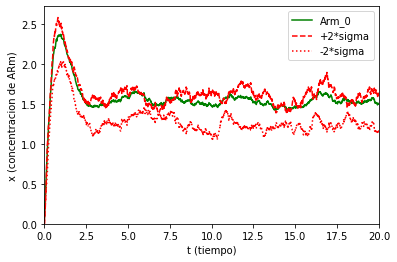

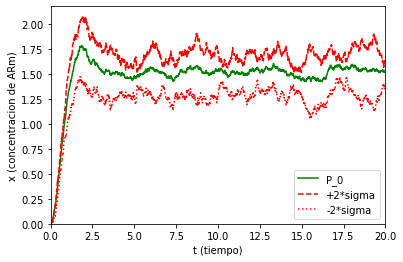

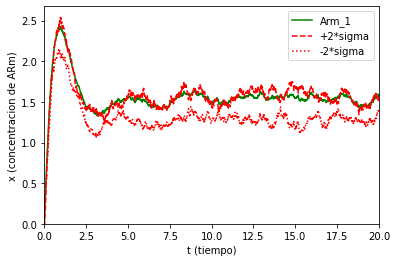

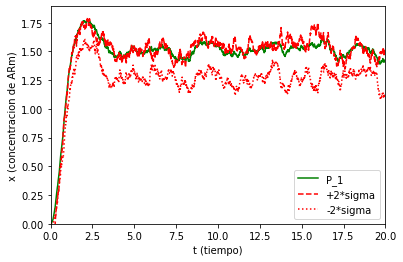

In [2]:
nom1=[1,2,3,4 ]

nom3=['Arm_0', 'P_0', 'Arm_1', 'P_1' ]

#realizar las graficas de las variables
h= 10000 #numero de veces para realizar la misma simulacion
varios(x,k,K,Omega,h)
#val(x,60,8000)

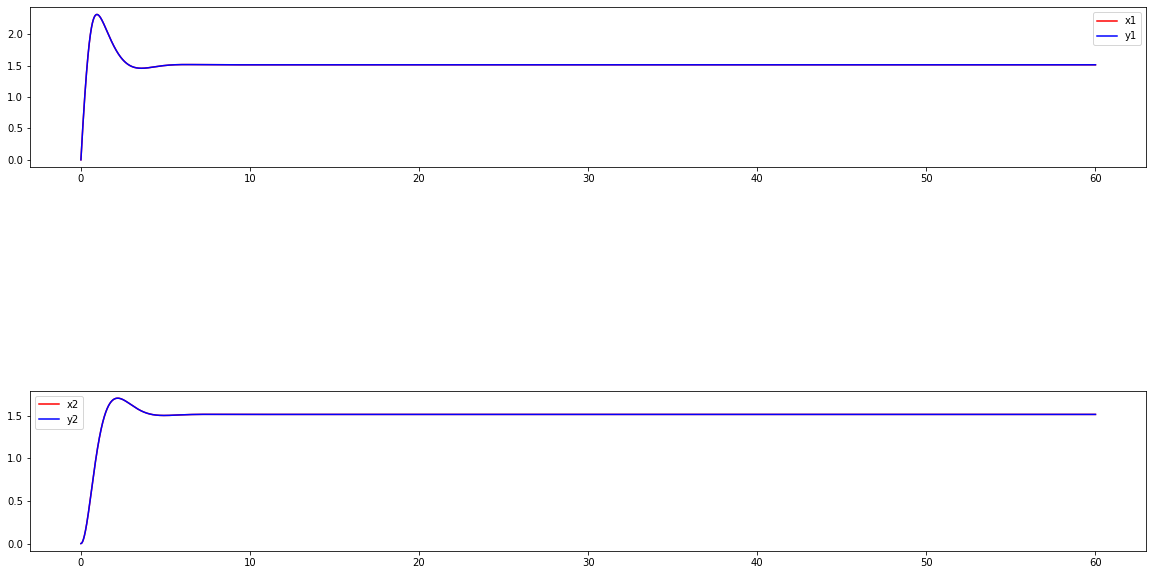

In [3]:
'''
Togle switch clasico
'''

import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d

from scipy.integrate import odeint

def Hill(x,n):
	return 1 / (1+x**n)


def Lorenz(State,t,a1,b1,a2,b2):
	x1, y1, x2, y2 = State 

	x1_dot = a1*(Hill(y2,2))- a2*x1
	x2_dot = x1 - a2*x2
	y1_dot = b1*(Hill(x2,2)) - b2*y1
	y2_dot = y1 - b2*y2


	return x1_dot, y1_dot, x2_dot, y2_dot


# Parámetros
a1=b1 = 5
a2= b2 = 1

# Condición inicial 
x1o, y1o = 0, 0.
x2o, y2o = 0., 0.

t = np.arange(0,60,0.001)

# A resolver

State   = odeint(Lorenz,(x1o,y1o,x2o,y2o),t,args=(a1,b1,a2, b2))
x1, y1, x2, y2 = State.T


# A graficar
fig = plt.figure(1,figsize=(20,10))
plt.subplot(311)
plt.plot(t,x1,color='red', label='x1')
plt.plot(t,y1,color='blue', label='y1')
plt.legend()
plt.subplot(313)
plt.plot(t,x2,color='red', label='x2')
plt.plot(t,y2,color='blue', label='y2')

#fig2 = plt.figure(2,figsize=(30,10))
#ax=axes3d.Axes3D(fig2)
#ax.plot(x1,y1,z1, color='green')
#ax.plot(x2,y2,z2, color='red')
plt.legend()
plt.show()

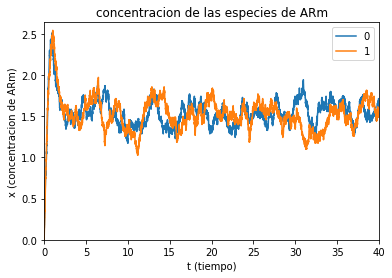

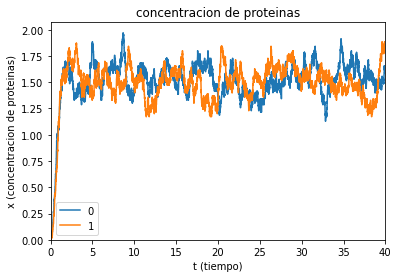

In [4]:
'Redes geneticas estocasticas' 'togle switch'

#En este programa se implementa el agoritmo de Gillespie para reacciones bioquimicas,
#especificamente para una red de transcripcion/traduccion.

# se importan las librerias que seran usadas
import numpy as np
import math 
import random as rnd
import matplotlib.pyplot as plt

#para implementar el algoritmo son necesarias algunas cantidades y definir algunos parametros
#condiciones iniciales de las variables involucradas y el tiempo

A=np.array([ [0,-1],
             [-1,0],]) # matriz de conexiones

t0=0.0 #tiempo inicial
tf= 40 # tiempo final
N=[2,2,2]  #coeficientes de de Hill para cada uno de los nodos
K=[1,1,1] # constantes de Michelson para cada nodo
h= 1 #numero de veces para realizar la misma simulacion
n= len(A[0]) #numero de nodos
n2= 2 #numero de elementos en cada nodo
Omega=70 # tamaño del sistema

#condiciones iniciales para cada nodo
x=[[0,0], #vector de condiciones iniciales [ARm0, P0]
    [0,0]]                              #  [ARm2, P2]


#parametros, los vectores para cada uno de los nodos 
p1=1
p2=5
k1=[p2,p1,1,p1]  #[sintesis o degradacion de ARm a travez de Hill, degradacion ARm, sintesis proteina, degradacion proteina]
k2=[p2,p1,1,p1]  
k3=[p2,p1,1,p1]  

k=[k1,k2,k3] # vector de parametros para todo el sistema

#contruimos la matriz estequiometrica para cada nodo 'evitar editar a partir de esta linea'
S= [[1,-1,0, 0],
    [ 0,0 ,1,-1],]

#construimos la matriz estequimetrica del sistema
def ST(S,n):
    l1=np.zeros([2,4])
    S1=S
    l2=l1
    l3=S
    for i in range(n-1):
        S1= np.append(S1, l2, axis = 1)
        l3=np.append(l1,l3, axis=1)
        S1= np.r_[S1,l3]
        l2= np.r_[l2,l1]
    return S1

S=ST(S,n)

#construimos lista nodos conectados entre si

def vec(A):
    l2=[]
    for i in range(n):
        for j in range(n):
            if A[i][j]!=0:
                l2.append(i)
    return l2

vecco= vec(A)

# miscelanea de funciones usadas

def prod(x, n): # x!/(x-n)!
    l2=x-n
    if n==0:
        return 1
    if l2==0 or l2==1:
        return math.fac(x)
    else:
        xprod= l2+1
        if n!=0 and l2>0:
            for i in range(1,n):
                xprod= xprod * (l2+1+i)
            return xprod

def heavinside(x): #funcion heavinside
    if x<=0:
        return 0
    else:
        return 1

def H_d(x,n,K,j): #funcion de hill determinista
    return 1/(K + (x/j)**n)

# construimos el vector de propension para cada nodo

def ninodo(y1,x1,k1,K1,j,N): #funcion de propension para cada nodo
    l1= [k1[0]*(H_d(y1,N,K1,j)), k1[1]*x1[0]/j, k1[2]*x1[0]/j, k1[3]*x1[1]/j]
    return l1

def ni(x,k,K,j): #funcion de porpension para todo el sistema
    l1=[]
    for i in range(n):
        l2=ninodo(x[vecco[i]][1],x[i],k[i],K[i],j,N[i])
        l1=l1+l2
    return l1

def dist_exp(a):# funcion para calcular tau 
    r = rnd.random()
    return -(1./(a))*math.log(r)
    
def numero(S1,a): # funcion que devuelve mu
    l1=0
    l2= S1[0]/a
    l3=0
    r=np.random.rand()
    while l1<len(S1):
        if l3==0:
            if r<=l2 and S1[l1]!=0:
                l3=l3+1
                return l1
            else:
               l1=l1+1
               l2= l2 + S1[l1]/a
 
# la funcion que esta a continuacion nos permite realizar  el proceso estocastico hasta que haya 
#pasado T tiempo para un determinado tamano del sistema.

def ev(x,k,K,j): #x=condicion inicial, p= numero de pasos, j=tamano del sistema
    Y = np.zeros([n,n2,1])
    t = []
    l2 = np.zeros([n,n2,1])
    l3=t0
    l4=0
    for j1 in range(n):
        for j2 in range(n2):
            Y[j1][j2][0] = x[j1][j2]
    t.append(t0)
    while l3<tf:
        ni1 = ni(Y[:,:,l4],k,K,j) #vector de propension
        a=sum(ni1)
        tau = dist_exp(a)/j
        mu = numero(ni1,a)
        l3=l3+tau
        t.append(l3)
        Y= np.append(Y, l2, axis = 2)
        l5=0
        for j1 in range(n):
            for j2 in range(n2):
                Y[j1][j2][l4+1] = Y[j1][j2][l4] + S[l5][mu]
                l5=l5+1
        l4=l4+1
    return t ,  Y/j
#con la funcion que ya hemos programado, podemos repetirla algun numero determinado de veces,
# para ello claculamos la funcion anterior algun numero de veces y la graficamos 

def varios(x,k,K,j,q): #p= pasos  j= tamano del sistema, 
   # q= numero de veces que se realiza la misma simulacion 
    l1=0
    l3=np.zeros([n,n2])
    while l1<q:
        T0, l3 =ev(x,k,K,j)
        for i in range(n):
            for j1 in range(n2):
                if j1==0:
                    plt.figure(1)
                    plt.plot(T0,l3[i][j1], label= i)
                    plt.xlabel("t (tiempo)")
                    plt.ylabel("x (concentracion de ARm)")
                    plt.title("concentracion de las especies de ARm" )
                    plt.xlim(0, tf)
                    plt.ylim(-0.0005)
                    plt.legend()
                if j1==1:
                    plt.figure(2)
                    plt.plot(T0,l3[i][j1], label= i)
                    plt.xlabel("t (tiempo)")
                    plt.ylabel("x (concentracion de proteinas)")
                    plt.title("concentracion de proteinas" )
                    plt.xlim(0, tf)
                    plt.ylim(-0.0001)
                    plt.legend()
        l1=l1+1
    plt.show()

#como alternativa podemos realizar las simulacion para varios tamanos de sistema
# omega={a,b}
q=200  #tamano de paso

#realizar las graficas de las variables
varios(x,k,K,Omega,h)
#val(x,60,8000)